#### [**Mathematical Modeling of Unsteady Inviscid Flows**](https://www.springer.com/gp/book/9783030183189)
**by Jeff D. Eldredge** (Springer, 2019)

This Jupyter notebook and associated code serve as a companion to the book. The notebook is powered by the [`PotentialFlow`](https://github.com/darwindarak/PotentialFlow.jl) package, written in the [Julia language](https://julialang.org/) by Darwin Darakananda and Jeff D. Eldredge. *The code is released under the [MIT license](https://opensource.org/licenses/MIT).*
<hr />

<!--NAVIGATION-->
< [Potential flows in the plane](3.2-PotentialFlowsInPlane.ipynb) | [Contents](Index.ipynb) | [Next notebook](Header.ipynb) >

<a id='top'></a>
## Corner and wedge flows

In this notebook we will generate flows in which there are a few stagnation streamlines in the form of straight rays emanating from the center. These are called corner (or wedge) flows, and they have a complex potential of the form

$$F(z) = Az^\alpha$$

where $A$ is a complex constant and $\alpha$ a positive real-valued constant. However, it is slightly more informative to write the complex potential in the form given by equation (3.93):

$$F(z) = \nu S L^{1-1/\nu} z^{1/\nu}$$

Here, $L$ is a characteristic length scale of the flow, $S$ is the complex strength of the flow, and $\nu$ is a parameter between $0$ and $2$ that defines the *interior angle* of the corner, given by $\pi \nu$.

The complex strength $S$ defines both the magnitude of the corner flow and the orientation of the corner. It is helpful to write it in the form (3.106)

$$S = i \sigma e^{-i \theta_{m}/\nu}$$ 

in which $\sigma$ is a real-valued constant (the signed intensity (3.103)), and $\theta_m$ is the angle of the bisector of the corner.

#### The usual preparatory steps.

In [ ]:
using PotentialFlow
using Plots
pyplot()

#### An example of a right-angled corner

Let us first create a corner flow with a 90-degree corner.

In [198]:
# signed intensity.
σ = 1.0

# interior angle of the corner.
ν = 0.7 

# characteristic length scale.
L = 1.0

# angle of the corner bisector.
θm = 3π/4;

In [192]:
m = sign(σ) == 1.0 ? 0 : 1
ϕ = θm/ν-m*π-π/2
β = θm-π
n₀ = exp(im*θm)
S = im*σ*n₀^(-1/ν)

-0.22252093395631428 - 0.9749279121818236im

In [193]:
F .= ν*S*L^(1-1/ν).*(Z.*exp(-im*(β+π))).^(1/ν)*exp(im*(β+π)/ν);

In [199]:
F .= ν*S*L^(1-1/ν).*Z.^(1/ν);

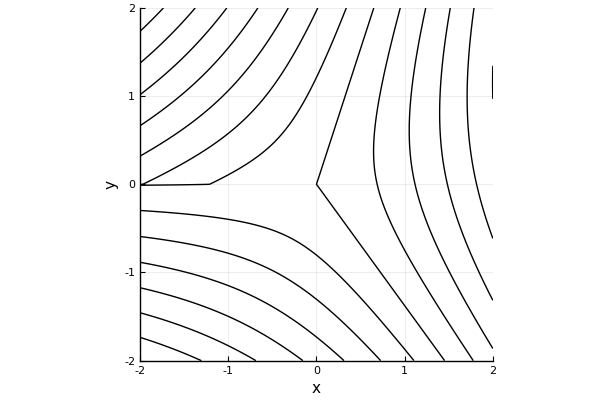

In [200]:
contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))

<!--NAVIGATION-->
< [Potential flows in the plane](3.2-PotentialFlowsInPlane.ipynb) | [Contents](Index.ipynb) | [Next notebook](Header.ipynb) >